
***

# R2.09 Méthodes numériques
## Exercices de cours
***
***

***
***


In [1]:
from math import log, sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#magic
import warnings
warnings.filterwarnings('ignore')

import time

In [2]:
plt.rcParams['figure.figsize'] = (10, 6)
#see https://matplotlib.org/stable/tutorials/introductory/pyplot.html for a more complete introduction to mathplot

## Un exemple du cours

Soit $(u_n)_{n\in \mathbb{N}}$ la suite définie par $u_0=1$ et pour $n\geq 1$,
$u_n=\sqrt{2+u_{n-1}}$.
On va étudier cette suite.

In [3]:
def un(n):
    if n==0:
        return 1
    else:
        return(sqrt(2+un(n-1)))
    
    

[1, 1.7320508075688772, 1.9318516525781366, 1.9828897227476208, 1.995717846477207, 1.9989291749527314, 1.9997322758191236, 1.9999330678348022, 1.9999832668887012, 1.9999958167178002, 1.9999989541791767, 1.9999997385447772, 1.9999999346361932, 1.9999999836590483, 1.999999995914762, 1.9999999989786905, 1.9999999997446727, 1.9999999999361682, 1.999999999984042, 1.9999999999960105, 1.9999999999990026, 1.9999999999997506, 1.9999999999999376, 1.9999999999999845, 1.999999999999996]


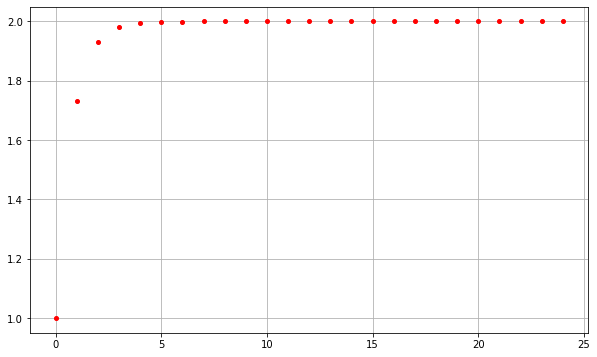

In [4]:
rg = range(0, 25)

s1 = [un(n) for n in rg]

print(s1)

plt.title('')
plt.plot(rg, s1, 'ro', markersize=4)


plt.grid()
plt.show()

In [5]:
for i in range(10):
    print(un(i+1)-un(i))
    print(np.sign(un(i+1)-un(i)))

0.7320508075688772
1.0
0.19980084500925943
1.0
0.05103807016948414
1.0
0.012828123729586194
1.0
0.003211328475524411
1.0
0.0008031008663922368
1.0
0.00020079201567857474
1.0
5.0199053899024904e-05
1.0
1.254982909904001e-05
1.0
3.137461376478967e-06
1.0


2.0
[0.001, 2.4494898448452487, 3.000000041666666, 3.2403703684918486, 3.3541019755666346, 3.4095454288291864, 3.436931773489983, 3.4505434365926333, 3.457329172049756, 3.460717050258967, 3.462409746257159, 3.4632557840113805, 3.463678725393587, 3.4638901767192434, 3.4639958975417446, 3.4640487567430425, 3.4640751860412196, 3.4640884006146924, 3.464095007882525, 3.464098311511715, 3.4640999633251286, 3.46410078923154, 3.464101202184672, 3.46410140866122, 3.4641015118994885, 3.464101563518622, 3.4641015893281883, 3.4641016022329714, 3.464101608685363, 3.4641016119115586, 3.4641016135246567, 3.464101614331206, 3.46410161473448, 3.4641016149361175, 3.464101615036936, 3.4641016150873454, 3.46410161511255, 3.4641016151251525, 3.464101615131453, 3.464101615134604, 3.464101615136179, 3.464101615136967, 3.464101615137361, 3.4641016151375577, 3.4641016151376562, 3.4641016151377055, 3.46410161513773, 3.4641016151377424, 3.4641016151377486, 3.4641016151377517, 3.464101615137753, 3.464101615137754

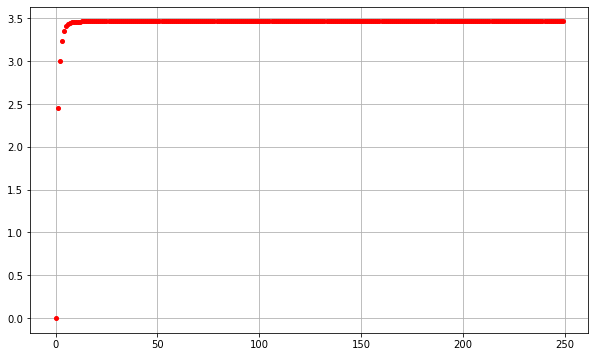

In [15]:
def PEI(n):
    if n==0:
        return .001
    else :
        return np.sqrt(.5*PEI(n-1)**2+6)

print(np.sqrt(4))
rg = range(0, 250)

s1 = [PEI(n) for n in rg]

print(s1)

plt.title('')
plt.plot(rg, s1, 'ro', markersize=4)


plt.grid()
plt.show()

## Interlude théorique :

Montrer que toute suite convergente est bornée.

***

## Suite arithmético-géométrique

On définit la suite la suite $(u_n)_n$ par $u_0 = a $ et $u_{n+1} = qu_n +r $.

On va étudier son comportement.

On prend comme exemple $u_0 = 1 $ et $u_{n+1} = 2u_n +3 $.

In [28]:
def arithm_geo(a,q,r,n):
    if n==0:
        return a
    else : 
        return q*arithm_geo(a,q,r,n-1)+r
    
    
for i in range(10):
    print(arithm_geo(1,2,3,i))

1
5
13
29
61
125
253
509
1021
2045


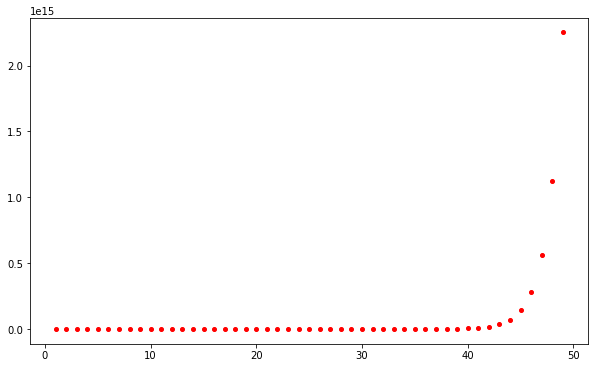

In [29]:
rg = range(1, 50)
s1 = [arithm_geo(1,2,3,n) for n in rg]
plt.plot(rg, s1, 'ro', markersize=4)

On va étudier la _suite auxilliaire_ $v_n = u_n  + x $ (on déterminera plus tard une bonne valeur de $x$).

$$
\begin{align*}
    v_{n+1} &= u_{n+1} + x \\
    &= qu_n +r +x \\
    \text{On fait apparaitre $v_n$}\\
    &= q(u_n +x) +r + x - qx \\
    &= q(v_n) +r + x - qx
\end{align*}
$$

On va alors chercher $r + x -qx = 0$, soit $x^* = \frac{-r}{1-q}$. Alors

\begin{align*}
    v_{n+1} &= u_{n+1} + x^*  \\
    &= qu_n +r +x^* \\
    \text{On fait apparaitre $v_n$}\\
    &= q(u_n +x^*) +r + x^* - qx^* \\
    &= q(v_n) +r + x^* - qx^*\\
    &= q(v_n)
\end{align*}

On s'est donc ramené a une suite géométrique, que l'on connait bien.

Ainsi, $v_n = aq^n$ ; donc $u_n = q^n(u_0 - x^*) -x^*$


Par exemple, prenons $u_0 = 1 $ et $u_{n+1} = 2u_n +3 $, alors $x^*  =\frac{-3}{1-2}  = 3$, et ainsi

$u_n = 2^n(1+3) + 3$

On vérifie numériquement :

In [44]:
def geometric_rec(a,q,n):
    '''
    in: common ratio q, scale factor a, number of iteration n
    type: q float, a float, n int
    return: n-th term of the geometric progression
    rtype:float
    '''
    if n==0:
        return a
    else :
        return q*geometric_rec(a,q,n-1)



In [45]:
for i in range(10):
    print(arithm_geo(1,2,3,i)-geometric_rec(4,2,i))

-3
-3
-3
-3
-3
-3
-3
-3
-3
-3


## Vitesse de Convergence

- Donner la limite de $a_n=\dfrac{1}{10}+\dfrac{1}{100}+\cdots+\dfrac{1}{10^n}$
- Donner le plus petit entier $N_a$ tel que $\dfrac{1}{9}-a_{N_a} < 10^{-6}$

- Donner la limite de $b_n=\dfrac{7}{10}+\dfrac{7}{100}+\cdots+\dfrac{7}{10^n}$
- Donner le plus petit entier $N_a$ tel que $\dfrac{7}{9}-a_{N_b}<10^{-8}$

## Suite(s) de Héron


Soit $u_n$ définie par $u_0 \in \mathbb{R}^*_+$, $u_{n+1} = {u_n + {2 \over u_n}\over 2}$. 



In [17]:
def Heron(u0,n):
    if n==0:
        return u0
    else : 
        temp=Heron(u0,n-1)
        return 1/2 * (temp+ 2/temp)
    
def Heron_bad(u0,n):
    if n==0:
        return u0
    else : 
        
        return 1/2 * (Heron_bad(u0,n-1)+ 2/Heron_bad(u0,n-1))
    
start = time.time()
Heron(42,100)
end = time.time()
print(end - start)

start = time.time()
Heron_bad(42,25)
end = time.time()
print(end - start)

0.0001430511474609375
7.0438292026519775


In [18]:
for i in range(25):
    print(Heron(1,i))

1
1.5
1.4166666666666665
1.4142156862745097
1.4142135623746899
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095
1.414213562373095


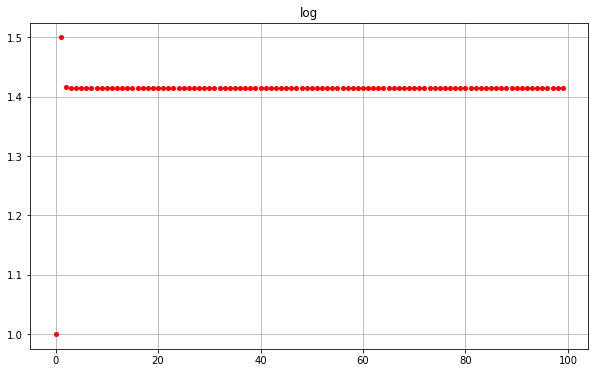

In [19]:
rg = range(0, 100)

s1 = [Heron(1,n) for n in rg]
s2 = [Heron(2,n) for n in rg]
s3 = [Heron(3,n) for n in rg]

plt.title('log')
plt.plot(rg, s1, 'ro', markersize=4)
#plt.plot(rg, s2, 'bx', markersize=4)
#plt.plot(rg, s3, 'g+', markersize=4)

plt.grid()
plt.show()

In [22]:
for i in range(10):
    print(Heron(.5,i+1)-Heron(.5,i))

1.75
-0.6805555555555556
-0.14755408062930186
-0.007656077875069167
-2.0723415141254975e-05
-1.5183720947220536e-10
0.0
0.0
0.0
0.0


### Généralisation

Soit $u_n$ définie par $u_0 = A$, $u_{n+1} = {u_n + {A \over u_n}\over 2}$. 



In [12]:
def Heron_gen(A,n):
    if n==0:
        return A
    else : 
        temp=Heron_gen(A,n-1)
        return 1/2 * (temp+ A/temp)
    

    


On teste pour quelques valeurs

In [15]:
[[i,Heron_gen(i,50)] for i in [1,2,4,8,9,10,16,25,100,1000]]


[[1, 1.0],
 [2, 1.414213562373095],
 [4, 2.0],
 [8, 2.82842712474619],
 [9, 3.0],
 [10, 3.162277660168379],
 [16, 4.0],
 [25, 5.0],
 [100, 10.0],
 [1000, 31.622776601683793]]

[2,
 1.5,
 1.4166666666666665,
 1.4142156862745097,
 1.4142135623746899,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095,
 1.414213562373095]